<h1>HandWritten Digit Classification using LeNet </h1>

<h2>Data Preprocessing</h2>

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [3]:
# Download and load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoader instances for the training and test datasets
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=4)

# Print the sizes of the training and test datasets
print(f'Training dataset size: {len(trainset)}')
print(f'Test dataset size: {len(testset)}')

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:44<00:00, 222900.34it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 88150.49it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:08<00:00, 205058.37it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 4359388.73it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Training dataset size: 60000
Test dataset size: 10000


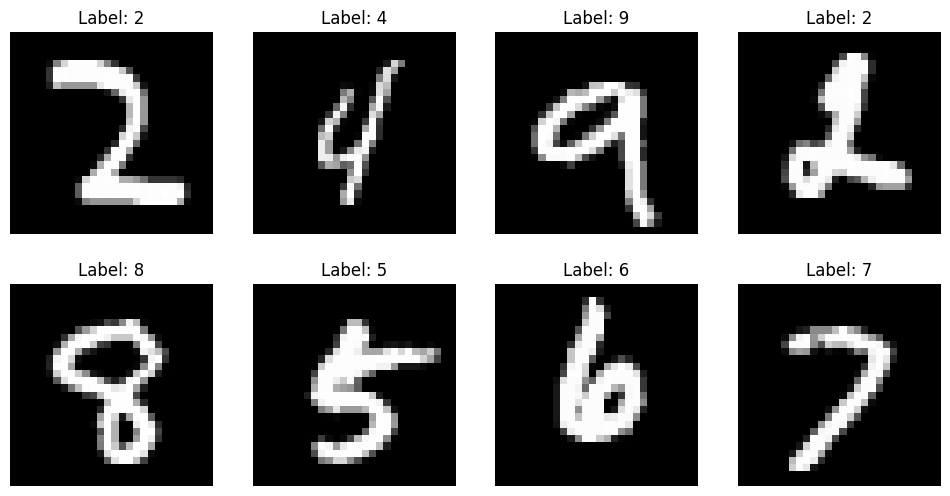

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show an image
def imshow(img):
    img = img.numpy()  # Convert tensor to numpy array
    plt.imshow(np.squeeze(img), cmap='gray')  # Remove the color channel and use grayscale
    plt.axis('off')  # Turn off the axis

# Get a batch of training data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Display the first 8 images from the batch
fig = plt.figure(figsize=(12, 6))
for idx in range(8):
    ax = fig.add_subplot(2, 4, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(f'Label: {labels[idx].item()}')

plt.show()


<h2>Defining LeNet Model Architecture</h2>

In [ ]:
# Define the LeNet model
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, 1, 2)  
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2, 2)
        x = x.view(-1, 16 * 5 * 5)  
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
model = LeNet()

<h2>Training Loop</h2>

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [15]:
epochs = 10
loss_list = []
accuracy = []
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images,labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images) #forwrad pass
        loss = criterion(outputs, labels)
        loss.backward()
         #backward pass
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_acc = 100 * correct / total
    loss_list.append(train_loss)
    accuracy.append(train_acc)
    print(f'Epoch : {epoch+1}, Train loss : {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%')

    

Epoch : 1, Train loss : 0.0652, Train Accuracy: 97.97%
Epoch : 2, Train loss : 0.0595, Train Accuracy: 98.18%
Epoch : 3, Train loss : 0.0544, Train Accuracy: 98.27%
Epoch : 4, Train loss : 0.0512, Train Accuracy: 98.40%
Epoch : 5, Train loss : 0.0473, Train Accuracy: 98.50%
Epoch : 6, Train loss : 0.0438, Train Accuracy: 98.59%
Epoch : 7, Train loss : 0.0426, Train Accuracy: 98.64%
Epoch : 8, Train loss : 0.0385, Train Accuracy: 98.78%
Epoch : 9, Train loss : 0.0366, Train Accuracy: 98.84%
Epoch : 10, Train loss : 0.0347, Train Accuracy: 98.92%


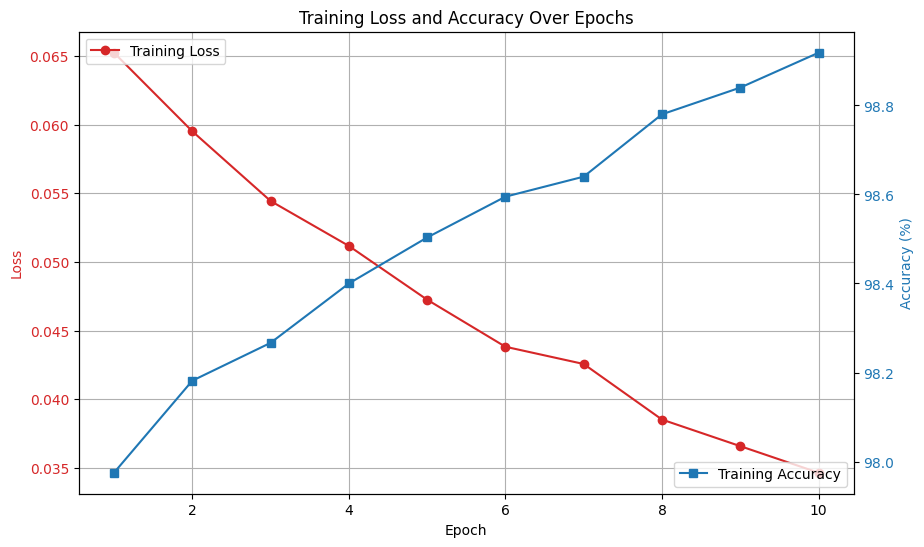

In [19]:
import matplotlib.pyplot as plt

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot training loss
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(range(1, epochs+1), loss_list, 'o-', color=color, label='Training Loss')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)  # Add grid lines for better readability

# Create a second y-axis to plot accuracy
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy (%)', color=color)
ax2.plot(range(1, epochs+1), accuracy, 's-', color=color, label='Training Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

# Add titles and legends
ax1.set_title('Training Loss and Accuracy Over Epochs')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add a legend to the second y-axis
ax2.legend(loc='lower right')

# Show the plot
plt.show()


<h2>Testing Model</h2>

In [16]:
# Testing Loop
model.eval()
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(testloader)
test_acc = 100 * correct / total
print(f'Test loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%')

Test loss: 0.0380, Test Accuracy: 98.69%


<h2>Saving Model</h2>

In [21]:
torch.save(model, 'lenet_mnist_model.pth')